# Recolección de datos electorales en Ecuador año 2002

Empezamos recolectando la información de las elecciones correspondientes al año 2002 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2002, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

## Descargando las bibliotecas necesarias para trabajar y limpiando las tablas

In [1]:
import pandas as pd
import numpy as np
import os
import glob 
import matplotlib as mp 
import matplotlib.pyplot as plt

Empezamos cargando la información relevante de la base de datos. Cambiamos el directorio al directorio de trabajo local y subimos los respectivos archivos.

In [2]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2002\2da vuelta")
df_p2002=pd.read_csv('parroquias 2002.csv')
df_p2002.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,1,AZUAY,260,CUENCA,285,BANOS,RURAL
1,1,AZUAY,260,CUENCA,730,CUMBE,RURAL
2,1,AZUAY,260,CUENCA,845,CHAUCHA/ANGAS,RURAL
3,1,AZUAY,260,CUENCA,860,CHECA JIDCAY,RURAL
4,1,AZUAY,260,CUENCA,905,CHIQUINTAD,RURAL


In [3]:
df_c2002=pd.read_csv('candidatos2002.csv')
df_c2002.head()

,DIGNIDAD_CODIGO,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1,SUPLENTE_GRUPOS_DE_EDAD.1,SUPLENTE_NOMBRE.2,SUPLENTE_SEXO.2,SUPLENTE_EDAD_EXACTA.2,SUPLENTE_GRUPOS_DE_EDAD.2
0,1,201,1000000000001,1,0,0,0,JUEZ ABUCHAKRA IVONNE LEYLA,2,51.654795,3,FRIXONE FRANCO CESAR NICOLAS,1,67.37534246575342,4,NaN,,,
1,1,202,1000000000002,1,0,0,0,GUTIERREZ BORBUA LUCIO EDWIN,1,45.578082,3,PALACIO GONZALEZ LUIS ALFREDO,1,63.74246575342466,3,NaN,,,
2,1,6,1000000000003,1,0,0,0,NEIRA MENENDEZ ANTONIO XAVIER,1,55.238356,3,PEREZ INTRIAGO ALVARO PATRICIO ALFREDO,1,66.19398907103825,4,NaN,,,
3,1,7,1000000000004,1,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,51.912329,3,CRUZ UTRERAS MARCELO EDUARDO,1,59.38082191780822,3,NaN,,,
4,1,10,1000000000005,1,0,0,0,BUCARAM ORTIZ JACOBO,1,55.210959,3,VARGAS PAZZOS FRANK ENRIQUE,1,68.26575342465753,4,NaN,,,


In [4]:
df_2V2002=pd.read_csv('2V2002.csv')
df_2V2002.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,SEXO,NUMERO_DE_JUNTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,1,260,285,1,30,25,321,202,1000000000002,2424,1
1,1,1,260,285,1,30,25,321,7,1000000000004,494,
2,1,1,260,285,2,31,54,373,202,1000000000002,3099,1
3,1,1,260,285,2,31,54,373,7,1000000000004,660,
4,1,1,260,730,1,11,11,81,202,1000000000002,873,1


Antes de nada, procedemos a limpiar la tabla de candidatos. Analizamos sus columnas primero. 

In [5]:
df_c2002.dtypes

DIGNIDAD_CODIGO                 int64
OP_CODIGO                       int64
CANDIDATO_CODIGO                int64
CANDIDATO_ORDEN                 int64
CANDIDATO_PROVINCIA_CODIGO      int64
CANDIDATO_CANTON_CODIGO         int64
CANDIDATO_PARROQUIA_CODIGO      int64
CANDIDATO_NOMBRE               object
CANDIDATO_SEXO                  int64
CANDIDATO_EDAD_EXACTA         float64
CANDIDATO_GRUPOS_DE_EDAD        int64
SUPLENTE_NOMBRE.1              object
SUPLENTE_SEXO.1                object
SUPLENTE_EDAD_EXACTA.1         object
SUPLENTE_GRUPOS_DE_EDAD.1      object
SUPLENTE_NOMBRE.2              object
SUPLENTE_SEXO.2                object
SUPLENTE_EDAD_EXACTA.2         object
SUPLENTE_GRUPOS_DE_EDAD.2      object
dtype: object

Eliminamos las columnas que no son relevantes. 

In [6]:
df_c2002=df_c2002.drop(['DIGNIDAD_CODIGO','CANDIDATO_ORDEN','CANDIDATO_PROVINCIA_CODIGO','CANDIDATO_CANTON_CODIGO','CANDIDATO_PARROQUIA_CODIGO'], axis=1)
df_c2002=df_c2002.drop(['CANDIDATO_SEXO','CANDIDATO_EDAD_EXACTA','CANDIDATO_GRUPOS_DE_EDAD','SUPLENTE_NOMBRE.1','SUPLENTE_SEXO.1','SUPLENTE_EDAD_EXACTA.1'], axis=1)
df_c2002=df_c2002.drop(['SUPLENTE_GRUPOS_DE_EDAD.1','SUPLENTE_NOMBRE.2','SUPLENTE_SEXO.2','SUPLENTE_EDAD_EXACTA.2','SUPLENTE_GRUPOS_DE_EDAD.2'], axis=1)
df_c2002.dtypes

OP_CODIGO            int64
CANDIDATO_CODIGO     int64
CANDIDATO_NOMBRE    object
dtype: object

In [7]:
df_c2002.head()

,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_NOMBRE
0,201,1000000000001,JUEZ ABUCHAKRA IVONNE LEYLA
1,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN
2,6,1000000000003,NEIRA MENENDEZ ANTONIO XAVIER
3,7,1000000000004,NOBOA PONTON ALVARO FERNANDO
4,10,1000000000005,BUCARAM ORTIZ JACOBO


De la tabla de resultados, también eliminamos las columnas sin importancia. 

In [8]:
df_2V2002=df_2V2002.drop(['DIGNIDAD_CODIGO','SEXO','CANDIDATO_ESTADO'], axis=1)
df_2V2002.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_JUNTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS
0,1,260,285,30,25,321,202,1000000000002,2424
1,1,260,285,30,25,321,7,1000000000004,494
2,1,260,285,31,54,373,202,1000000000002,3099
3,1,260,285,31,54,373,7,1000000000004,660
4,1,260,730,11,11,81,202,1000000000002,873


Una vez reducidas la cantidad de columnas, verificamos la probabilidad de datos duplicados en nuestra tabla. 

In [9]:
duplicate_rows_df = df_2V2002[df_2V2002.duplicated()]
print("filas duplicadas: ", duplicate_rows_df.shape)

filas duplicadas:  (8, 9)


Que hayan datos duplicados puede significar que haya habido un error al ingresar los datos, o algun otro factor (OJO). Procedemos a eliminar las filas duplicadas. 

In [10]:
df_2V2002.count()

PROVINCIA_CODIGO    4644
CANTON_CODIGO       4644
PARROQUIA_CODIGO    4644
NUMERO_DE_JUNTAS    4644
VOTOS_EN_BLANCO     4644
VOTOS_NULOS         4644
OP_CODIGO           4644
CANDIDATO_CODIGO    4644
CANDIDATO_VOTOS     4644
dtype: int64

In [11]:
df_2V2002.drop_duplicates()
df_2V2002.count()

PROVINCIA_CODIGO    4644
CANTON_CODIGO       4644
PARROQUIA_CODIGO    4644
NUMERO_DE_JUNTAS    4644
VOTOS_EN_BLANCO     4644
VOTOS_NULOS         4644
OP_CODIGO           4644
CANDIDATO_CODIGO    4644
CANDIDATO_VOTOS     4644
dtype: int64

Una vez eliminadas las filas duplicadas, revisamos si existan filas que posean datos nulos. Utilizamos el siguiente código.

In [12]:
print(df_2V2002.isnull().sum())

PROVINCIA_CODIGO    0
CANTON_CODIGO       0
PARROQUIA_CODIGO    0
NUMERO_DE_JUNTAS    0
VOTOS_EN_BLANCO     0
VOTOS_NULOS         0
OP_CODIGO           0
CANDIDATO_CODIGO    0
CANDIDATO_VOTOS     0
dtype: int64


Por lo visto no existen datos nulos, por lo que continuamos con el arreglo de nuestras tablas de información. 

---

### Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato.

In [13]:
df_c2002.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2002.head()

,OP_CODIGO,CODIGO,CANDIDATO_NOMBRE
0,201,1000000000001,JUEZ ABUCHAKRA IVONNE LEYLA
1,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN
2,6,1000000000003,NEIRA MENENDEZ ANTONIO XAVIER
3,7,1000000000004,NOBOA PONTON ALVARO FERNANDO
4,10,1000000000005,BUCARAM ORTIZ JACOBO


Procedemos a hacer la union de las dos tablas de datos. 

In [14]:
df_rp=pd.merge(left=df_2V2002, right=df_c2002.head(), how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_rp.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_JUNTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN
1,1,260,285,30,25,321,7,1000000000004,494,7,1000000000004,NOBOA PONTON ALVARO FERNANDO
2,1,260,285,31,54,373,202,1000000000002,3099,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN
3,1,260,285,31,54,373,7,1000000000004,660,7,1000000000004,NOBOA PONTON ALVARO FERNANDO
4,1,260,730,11,11,81,202,1000000000002,873,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN


La tabla se ve mucho mejor, por lo que ahora agrupamos los votos por candidato. 

In [15]:
df_rp=df_rp.groupby('CANDIDATO_NOMBRE')['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_rp

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
GUTIERREZ BORBUA LUCIO EDWIN,50938,640074,2803243
NOBOA PONTON ALVARO FERNANDO,50938,640074,2312854


Realizamos un gráfico de pastel para poder visibilizar mejor la información. 

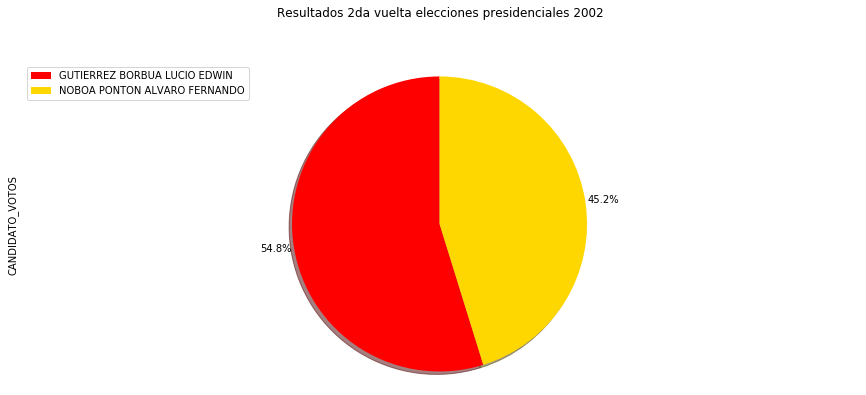

In [16]:
Colores= ['red','gold']

df_rp['CANDIDATO_VOTOS'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            )

# Título del gráfico
plt.title('Resultados 2da vuelta elecciones presidenciales 2002', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='upper left') 

plt.show()

---

### Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos. 

In [17]:
df_p=pd.merge(left=df_2V2002, right=df_c2002, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_JUNTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE
0,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN
1,1,260,285,30,25,321,7,1000000000004,494,7,1000000000004,NOBOA PONTON ALVARO FERNANDO
2,1,260,285,31,54,373,202,1000000000002,3099,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN
3,1,260,285,31,54,373,7,1000000000004,660,7,1000000000004,NOBOA PONTON ALVARO FERNANDO
4,1,260,730,11,11,81,202,1000000000002,873,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN


In [18]:
df_p=pd.merge(left=df_p, right=df_p2002, how='left', left_on='PROVINCIA_CODIGO', right_on='PROVINCIA_CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO_x,PARROQUIA_CODIGO_x,NUMERO_DE_JUNTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,PROVINCIA_NOMBRE,CANTON_CODIGO_y,CANTON_NOMBRE,PARROQUIA_CODIGO_y,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,285,BANOS,RURAL
1,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,730,CUMBE,RURAL
2,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,845,CHAUCHA/ANGAS,RURAL
3,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,860,CHECA JIDCAY,RURAL
4,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,905,CHIQUINTAD,RURAL


Procedemos a agrupar la información por candidato y provincia. 

In [27]:
df_prov=df_p.groupby(['PROVINCIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_prov

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  VOTOS_NULOS  \
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                                             
AZUAY            GUTIERREZ BORBUA LUCIO EDWIN           249920      3076744   
                 NOBOA PONTON ALVARO FERNANDO           249920      3076744   
BOLIVAR          GUTIERREZ BORBUA LUCIO EDWIN            24940       339938   
                 NOBOA PONTON ALVARO FERNANDO            24940       339938   
CANAR            GUTIERREZ BORBUA LUCIO EDWIN            28476       361296   
                 NOBOA PONTON ALVARO FERNANDO            28476       361296   
CARCHI           GUTIERREZ BORBUA LUCIO EDWIN            19880       298270   
                 NOBOA PONTON ALVARO FERNANDO            19880       298270   
CHIMBORAZO       GUTIERREZ BORBUA LUCIO EDWIN           216367      1998482   
                 NOBOA PONTON ALVARO FERNANDO           216367      1998482   
COTOPAXI         GUTIERREZ BORBUA LUCIO EDWIN            85365      1054620   
                 NOBOA PONTON ALVARO FERNANDO            85365      1054620   
EL ORO           GUTIERREZ BORBUA LUCIO EDWIN           135058      1527372   
                 NOBOA PONTON ALVARO FERNANDO           135058      1527372   
ESMERALDAS       GUTIERREZ BORBUA LUCIO EDWIN           113850      1150842   
                 NOBOA PONTON ALVARO FERNANDO           113850      1150842   
GALAPAGOS        GUTIERREZ BORBUA LUCIO EDWIN              600         4688   
                 NOBOA PONTON ALVARO FERNANDO              600         4688   
GUAYAS           GUTIERREZ BORBUA LUCIO EDWIN          1167105     12576198   
                 NOBOA PONTON ALVARO FERNANDO          1167105     12576198   
IMBABURA         GUTIERREZ BORBUA LUCIO EDWIN            90062      1164485   
                 NOBOA PONTON ALVARO FERNANDO            90062      1164485   
LOJA             GUTIERREZ BORBUA LUCIO EDWIN           148797      1562913   
                 NOBOA PONTON ALVARO FERNANDO           148797      1562913   
LOS RIOS         GUTIERREZ BORBUA LUCIO EDWIN           143480      1262160   
                 NOBOA PONTON ALVARO FERNANDO           143480      1262160   
MANABI           GUTIERREZ BORBUA LUCIO EDWIN           572760      5024430   
                 NOBOA PONTON ALVARO FERNANDO           572760      5024430   
MORONA SANTIAGO  GUTIERREZ BORBUA LUCIO EDWIN            19836       168896   
                 NOBOA PONTON ALVARO FERNANDO            19836       168896   
NAPO             GUTIERREZ BORBUA LUCIO EDWIN             2392        34753   
                 NOBOA PONTON ALVARO FERNANDO             2392        34753   
ORELLANA         GUTIERREZ BORBUA LUCIO EDWIN             5610        78608   
                 NOBOA PONTON ALVARO FERNANDO             5610        78608   
PASTAZA          GUTIERREZ BORBUA LUCIO EDWIN             3780        36680   
                 NOBOA PONTON ALVARO FERNANDO             3780        36680   
PICHINCHA        GUTIERREZ BORBUA LUCIO EDWIN           636004     15465820   
                 NOBOA PONTON ALVARO FERNANDO           636004     15465820   
SUCUMBIOS        GUTIERREZ BORBUA LUCIO EDWIN            13299       145893   
                 NOBOA PONTON ALVARO FERNANDO            13299       145893   
TUNGURAHUA       GUTIERREZ BORBUA LUCIO EDWIN           126126      1898190   
                 NOBOA PONTON ALVARO FERNANDO           126126      1898190   
ZAMORA CHINCHIPE GUTIERREZ BORBUA LUCIO EDWIN             6293        50747   
                 NOBOA PONTON ALVARO FERNANDO             6293        50747   

                                               CANDIDATO_VOTOS  
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                               
AZUAY            GUTIERREZ BORBUA LUCIO EDWIN         16348816  
                 NOBOA PONTON ALVARO FERNANDO          4586736  
BOLIVAR          GUTIERREZ BORBUA LUCIO EDWIN          1573540  
                 NOBOA PONTON ALVARO FERNANDO           632113  
CANAR            GUTIE

Para poder visualizar mejor la información, procedemos a realizar un gráfico de barras con la tabla obtenida

In [60]:
df_prov1=df_prov['CANDIDATO_VOTOS']
df_prov1=df_prov1.unstack(level=[1])

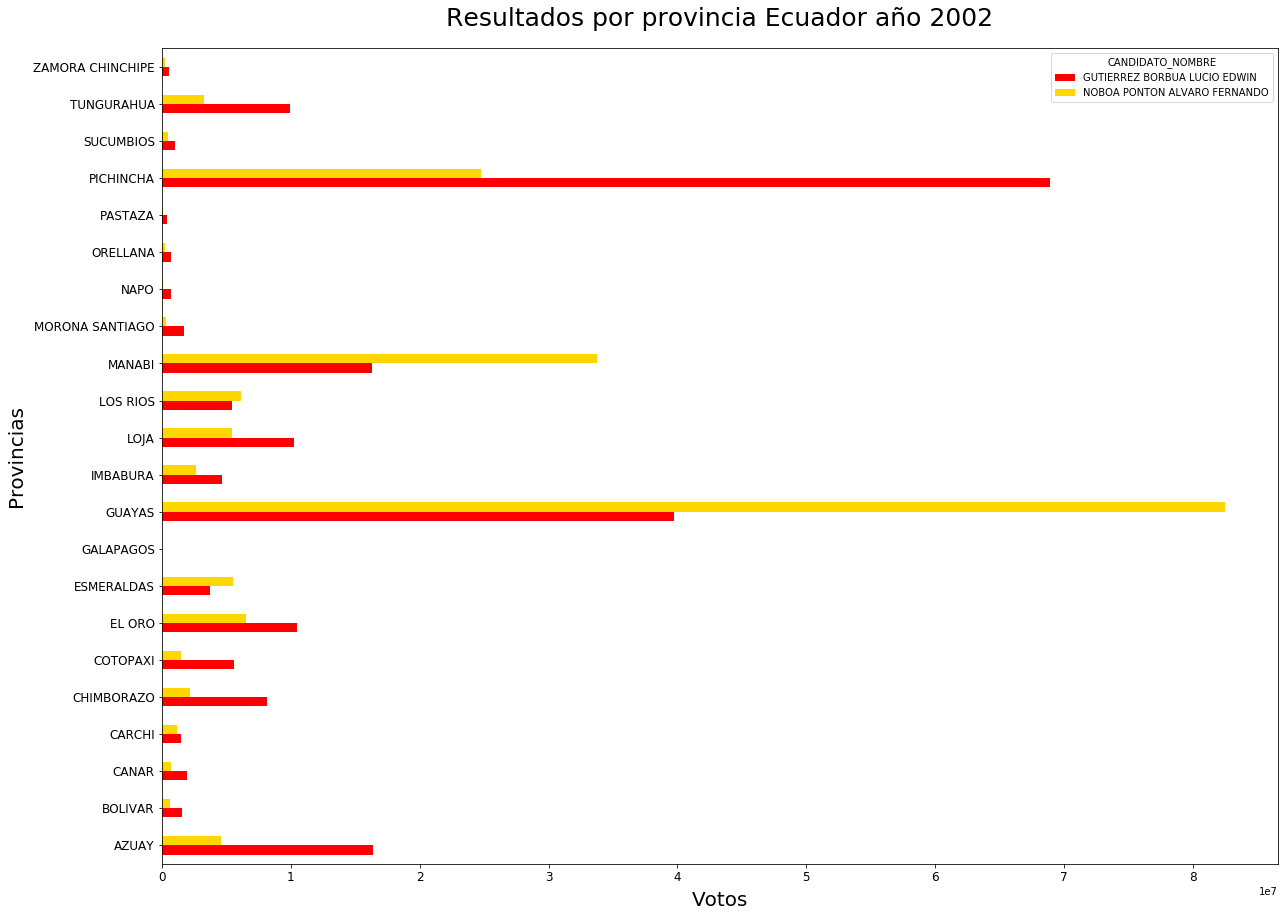

In [59]:
df_prov1.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2002', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

---

### Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato. 

In [61]:
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO_x,PARROQUIA_CODIGO_x,NUMERO_DE_JUNTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,OP_CODIGO_y,CODIGO,CANDIDATO_NOMBRE,PROVINCIA_NOMBRE,CANTON_CODIGO_y,CANTON_NOMBRE,PARROQUIA_CODIGO_y,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,285,BANOS,RURAL
1,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,730,CUMBE,RURAL
2,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,845,CHAUCHA/ANGAS,RURAL
3,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,860,CHECA JIDCAY,RURAL
4,1,260,285,30,25,321,202,1000000000002,2424,202,1000000000002,GUTIERREZ BORBUA LUCIO EDWIN,AZUAY,260,CUENCA,905,CHIQUINTAD,RURAL


In [62]:
df_cant=df_p.groupby(['CANTON_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_cant.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  VOTOS_NULOS  \
CANTON_NOMBRE      CANDIDATO_NOMBRE                                             
24 DE MAYO         GUTIERREZ BORBUA LUCIO EDWIN            25456       223308   
                   NOBOA PONTON ALVARO FERNANDO            25456       223308   
A.BAQUERIZO MORENO GUTIERREZ BORBUA LUCIO EDWIN            13415       144554   
                   NOBOA PONTON ALVARO FERNANDO            13415       144554   
AGUARICO           GUTIERREZ BORBUA LUCIO EDWIN              990        13872   
                   NOBOA PONTON ALVARO FERNANDO              990        13872   
ALAUSI             GUTIERREZ BORBUA LUCIO EDWIN            35470       327620   
                   NOBOA PONTON ALVARO FERNANDO            35470       327620   
AMBATO             GUTIERREZ BORBUA LUCIO EDWIN            54054       813510   
                   NOBOA PONTON ALVARO FERNANDO            54054       813510   
ANTONIO ANTE       GUTIERREZ BORBUA LUCIO EDWIN            11028       142590   
                   NOBOA PONTON ALVARO FERNANDO            11028       142590   
ARAJUNO            GUTIERREZ BORBUA LUCIO EDWIN              378         3668   
                   NOBOA PONTON ALVARO FERNANDO              378         3668   
ARCHIDONA          GUTIERREZ BORBUA LUCIO EDWIN              312         4533   
                   NOBOA PONTON ALVARO FERNANDO              312         4533   
ARENILLAS          GUTIERREZ BORBUA LUCIO EDWIN             7016        79344   
                   NOBOA PONTON ALVARO FERNANDO             7016        79344   
ATACAMES           GUTIERREZ BORBUA LUCIO EDWIN             8625        87185   
                   NOBOA PONTON ALVARO FERNANDO             8625        87185   

                                                 CANDIDATO_VOTOS  
CANTON_NOMBRE      CANDIDATO_NOMBRE                               
24 DE MAYO         GUTIERREZ BORBUA LUCIO EDWIN           723580  
                   NOBOA PONTON ALVARO FERNANDO          1500208  
A.BAQUERIZO MORENO GUTIERREZ BORBUA LUCIO EDWIN           457030  
                   NOBOA PONTON ALVARO FERNANDO           947742  
AGUARICO           GUTIERREZ BORBUA LUCIO EDWIN           124716  
                   NOBOA PONTON ALVARO FERNANDO            44352  
ALAUSI             GUTIERREZ BORBUA LUCIO EDWIN          1343680  
                   NOBOA PONTON ALVARO FERNANDO           361530  
AMBATO             GUTIERREZ BORBUA LUCIO EDWIN          4249341  
                   NOBOA PONTON ALVARO FERNANDO          1411614  
ANTONIO ANTE       GUTIERREZ BORBUA LUCIO EDWIN           570672  
                   NOBOA PONTON ALVARO FERNANDO           324324  
ARAJUNO            GUTIERREZ BORBUA LUCIO EDWIN            36790  
                   NOBOA PONTON ALVARO FERNANDO             9364  
ARCHIDONA          GUTIERREZ BORBUA LUCIO EDWIN            88950  
                   NOBOA PONTON ALVARO FERNANDO             8466  
ARENILLAS          GUTIERREZ BORBUA LUCIO EDWIN           546440  
                   NOBOA PONTON ALVARO FERNANDO           337596  
ATACAMES           GUTIERREZ BORBUA LUCIO EDWIN           282335  
                   NOBOA PONTON ALVARO FERNANDO           420250

In [63]:
df_cant.loc['GUAYAQUIL']

,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
GUTIERREZ BORBUA LUCIO EDWIN,281715,3035634,9597630
NOBOA PONTON ALVARO FERNANDO,281715,3035634,19902582


---

### Agrupando los votos por parroquia

Finalmente, hacemos lo mismo pero por parroquia. 

In [65]:
df_parr=df_p.groupby(['PARROQUIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_parr.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  VOTOS_NULOS  \
PARROQUIA_NOMBRE   CANDIDATO_NOMBRE                                             
10 DE AGOSTO       GUTIERREZ BORBUA LUCIO EDWIN             6553        57661   
                   NOBOA PONTON ALVARO FERNANDO             6553        57661   
11 DE NOVIEMBRE    GUTIERREZ BORBUA LUCIO EDWIN             1897        23436   
                   NOBOA PONTON ALVARO FERNANDO             1897        23436   
11 DE OCTUBRE      GUTIERREZ BORBUA LUCIO EDWIN             3587        31554   
                   NOBOA PONTON ALVARO FERNANDO             3587        31554   
12 DE DICIEMBRE    GUTIERREZ BORBUA LUCIO EDWIN             1503        15787   
                   NOBOA PONTON ALVARO FERNANDO             1503        15787   
12 DE MARZO        GUTIERREZ BORBUA LUCIO EDWIN             6364        55827   
                   NOBOA PONTON ALVARO FERNANDO             6364        55827   
16 DE AGOSTO       GUTIERREZ BORBUA LUCIO EDWIN              342         2912   
                   NOBOA PONTON ALVARO FERNANDO              342         2912   
18 DE OCTUBRE      GUTIERREZ BORBUA LUCIO EDWIN             6364        55827   
                   NOBOA PONTON ALVARO FERNANDO             6364        55827   
24 DE MAYO         GUTIERREZ BORBUA LUCIO EDWIN             3587        31554   
                   NOBOA PONTON ALVARO FERNANDO             3587        31554   
27 DE ABRIL/LA NAR GUTIERREZ BORBUA LUCIO EDWIN             1503        15787   
                   NOBOA PONTON ALVARO FERNANDO             1503        15787   
27 DE SEPTIEMBRE   GUTIERREZ BORBUA LUCIO EDWIN              568         8522   
                   NOBOA PONTON ALVARO FERNANDO              568         8522   

                                                 CANDIDATO_VOTOS  
PARROQUIA_NOMBRE   CANDIDATO_NOMBRE                               
10 DE AGOSTO       GUTIERREZ BORBUA LUCIO EDWIN           199290  
                   NOBOA PONTON ALVARO FERNANDO           379734  
11 DE NOVIEMBRE    GUTIERREZ BORBUA LUCIO EDWIN           125134  
                   NOBOA PONTON ALVARO FERNANDO            32355  
11 DE OCTUBRE      GUTIERREZ BORBUA LUCIO EDWIN           135176  
                   NOBOA PONTON ALVARO FERNANDO           153540  
12 DE DICIEMBRE    GUTIERREZ BORBUA LUCIO EDWIN           103585  
                   NOBOA PONTON ALVARO FERNANDO            54719  
12 DE MARZO        GUTIERREZ BORBUA LUCIO EDWIN           180895  
                   NOBOA PONTON ALVARO FERNANDO           375052  
16 DE AGOSTO       GUTIERREZ BORBUA LUCIO EDWIN            29863  
                   NOBOA PONTON ALVARO FERNANDO             5680  
18 DE OCTUBRE      GUTIERREZ BORBUA LUCIO EDWIN           180895  
                   NOBOA PONTON ALVARO FERNANDO           375052  
24 DE MAYO         GUTIERREZ BORBUA LUCIO EDWIN           135176  
                   NOBOA PONTON ALVARO FERNANDO           153540  
27 DE ABRIL/LA NAR GUTIERREZ BORBUA LUCIO EDWIN           103585  
                   NOBOA PONTON ALVARO FERNANDO            54719  
27 DE SEPTIEMBRE   GUTIERREZ BORBUA LUCIO EDWIN            42936  
                   NOBOA PONTON ALVARO FERNANDO            33210

Comprobamos la información usando la parroquia TARQUI. 

In [66]:
df_parr.loc['TARQUI']

,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
GUTIERREZ BORBUA LUCIO EDWIN,22808,237178,842102
NOBOA PONTON ALVARO FERNANDO,22808,237178,1379598


---

## Exportando la Información

Una vez que tenemos nuestras tablas listas, las exportamos a un formato amigable para poderla visualizar. Comenzamos exportando la información por cada tabla de datos.

In [71]:
df_rp.to_excel('Resultados 2002.xlsx',sheet_name='Hoja1')
print('Operación exitosa')

Operación exitosa


In [72]:
df_prov.to_excel('Resultados provincia 2002.xlsx',sheet_name='Hoja2')
print('Operación exitosa')

Operación exitosa


In [73]:
df_cant.to_excel('Resultados canton 2002.xlsx',sheet_name='Hoja3')
print('Operación exitosa')

Operación exitosa


In [74]:
df_parr.to_excel('Resultados parroquias 2002.xlsx',sheet_name='Hoja4')
print('Operación exitosa')

Operación exitosa


Finalmente comfirmamos que la información se haya copiado sin ningún problema. 

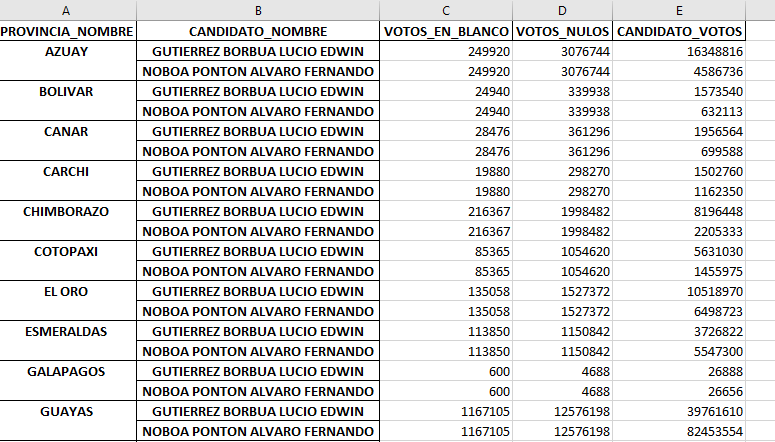